## Naive Bayes (Bayes Ingenuo)

Los clasificadores de Bayes ingenuos son clasificadores lineales conocidos por su simpleza y eficiencia. El modelo probabilístico de los clasificadores de Bayes ingenuos se basa en el Teorema de Bayes y el adjetivo *ingenuo* viene de la suposición  de que las características en la base de datos son mutuamente independientes.

En la práctica, la suposición de independencia se viola frecuentemente, pero el clasificador de Bayes ingenuo tiende a tener un buen desempeño aún bajo esta suposición poco realista, especialmente para tamaños pequeños de muestra.

Algunos campos en los que se usa el clasificador Bayesiano ingenuo son: diagnóstico de enfermedades, clasificación de secuencias de RNA y filtrado de spam en clientes de correo.

Con el fin de entender mejor el trabajo de los clasificadores Bayesianos ingenuos se deben tener en cuenta los siguientes conceptos.

1.***Probabilidad a posteriori***

La probabilidad a posteriori está definida por el teorema de Bayes de la siguiente manera:

$$ P_{a-posteriori} = \frac{P_{condicional} \times P_{a-priori}}{evicencia}$$

La probabilidad a posteriori puede  definirse en el contexto de la clasificación como *¿Cuál es la probabilidad de un objeto particular de pertenecer a la clase $i$ dados sus valores de características observados?*

*Ejemplo*

¿Cuál es la probabilidad de que una persona tenga diabetes dado cierto valor de glucosa medida en la sangre pre y post?, i.e.:

$$P(diabetes|\mathbf{x}_i), \quad \mathbf{x}_i=[90mg/dl,145mg/dl],$$

donde:

* $\mathbf{x}_i$ es el vector de características de la obsrvación $i$, con $i=1,2,\ldots,n$
* $\omega_j$ la notación de clase $j$, con $j=1,2,\ldots,m$
* $P(\mathbf{x}_i|\omega_j)$ la probabliliad de observar la muestra $\mathbf{x}_i$ dado que pertenece a la clase $\omega_j$.

La notación general de la probabilidad a posteriori se puede escribir como:

$$P(\omega_j|\mathbf{x}_i)=\frac{P(\mathbf{x}_i|\omega_j)P(\omega_j)}{P(\mathbf{x}_i)}$$

La función objetivo en la probabilidad de Bayes ingenuo, es maximizar la probabilidad a posteriori dado el conjunto de entrenamiento, en orden de formular la regla de decisión.

$$\omega_{predict}\leftarrow \arg\max_{j=1,\ldots,m}P(\omega_j|\mathbf{x}_i)$$.

Continuando con el ejemplo, se podría formular la regla de decisión basada en las probabilidades a posteriori como sigue:

>*** La persona tiene diabetes si 
$$P(diabetes|\mathbf{x}_i)\geq P(no-diabetes|\mathbf{x}_i)$$
> si no, la persona es saludable ***

2.***Probabilidad de clase condicional***

Una suposición que los clasificadores Bayesianos hacen es que las muestras son *i.i.d*. La independencia significa que la probabilidad de una observiación no afecta la probabilidad de otra observación.

Una suposición adicional de los clasificadores Bayesianos ingenuos, es la *independencia condicional* de las características. Bajo este supuesto, la probabilidad de clase condicional o verosimilitud de las puestras se puede esttimar directamente del conjunto de entrenamiento evaluando todas las posibilidades de $\mathbf{x}$. La probabilidad de clase condicional puede calcularse como:

$$P(\mathbf{x}|\omega_j)=P(x_1|\omega_j)P(x_2|\omega_2)\ldots P(x_p|\omega_j)=\prod_{k=1}^{p}P(x_k|\omega_j)$$

Aquí $P(\mathbf{x}|\omega_j)$ significa *¿Qué tan probable es observar este patrón particular $\mathbf{x}$ dado a que pertenece a la clase $\omega_j$?*. Las verosimilitudes individuales para cada característica pueden estimarse vía estimación de máxima verosimilitud, lo que es una simple fecuencia en el caso de datos categóricos:

$$\hat{P}(x_i|\omega_j)=\frac{N_{x_i,\omega_j}}{N_{\omega_j}},$$

donde $N_{x_i,\omega_j}$ es el número de veces que la característica $x_i$ aparece en las observaciones de clase $\omega_j$, y $N_{\omega_j}$ es el conteo total de todas las característias en la clase $\omega_j$

3.*** Probabilidad a priori***

Esta probabilidad se puede interpretar como el conocimiento a priori. En el contexto de la clasificación, la probabilidad a priori también es llamada *prior de clase*, que describe la *probabilidad general de encontrar una clase particular*. Si los priores siguen una distribución uniforme, las probabilidades posteriores estarán determinadas por completo de la probabilidad de clase condicional y de la evidencia.

Eventualmente, el conocimiento a priori puede ser determinado  a través del conjunto de entrenamiento, si se asume que los datos de entrenamiento son *i.i.d* y que son una muestra representativa de toda la población. La estimación de máxima verosimilitud puede formularse como:

$$\hat{P}(\omega_j)=\frac{N_{\omega_j}}{N_c},$$

donde $N_{\omega_j}$ es el número de muestras de la clase $\omega_j$ y $N_c$ todas las muestras.

4.***Evidencia***

La evidencia $P(\mathbf{x})$ puede entenderse como la probabilidad de encontrar un patrón particular $\mathbf{x}$ independientemente de la etiqueta de clase. Usualmente se puede eliminar de la regla de decisión, debido a que suele ser común a todos los términos.

Para la implementación de este clasificador tenemos:

In [1]:
import numpy as np #importamos la librería numérica
import matplotlib.pyplot as plt #importamos la librería para graficar
from sklearn.naive_bayes import GaussianNB #importamos la librería que contiene el clasificador de Bayes
from sklearn.model_selection import train_test_split #importamos la librería para la división de la base de datos

In [3]:
#importamos el archivo de datos que contiene la Base de Dats. El formato es de valores separados por coma.
input_file = 'Data_NaiveBayes.txt'
#Cargamos los datos. Es importante pasar como argumento el delimitador (coma en este caso)
data = np.loadtxt(input_file, delimiter=',')
print(data.shape)
X,y = data[:,:-1],data[:,-1] #la matriz de observaciones consta de todas las columnas exceptuando la última. El vector de etiquetas
#corresponde a la última columna que está en el archivo

(400, 5)


**Ejercicio 1**

Realiza las gráficas de la matriz de observaciones con todas las posibles combinaciones de las características (e.j. Característica 1 vs Característica 2, Característica 1 vs Característica 3, etc). Asegúrate de que cada una de las clases se vea de un color diferente para saber cuáles características serían mejores para clasificar (las que sean linealmente separables)


[ 0.  1.  2.  3.]
(400, 4)


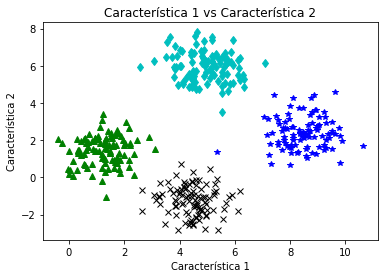

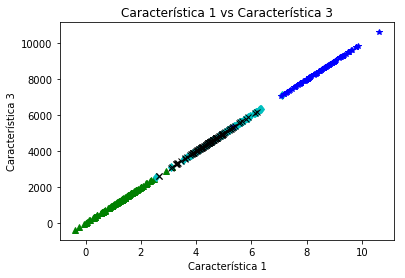

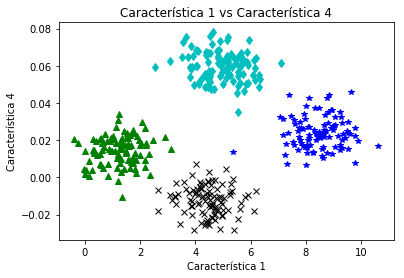

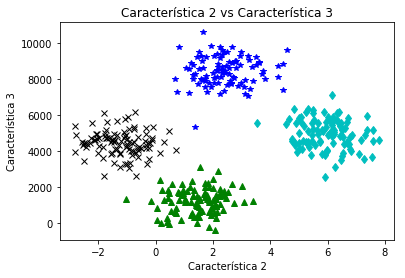

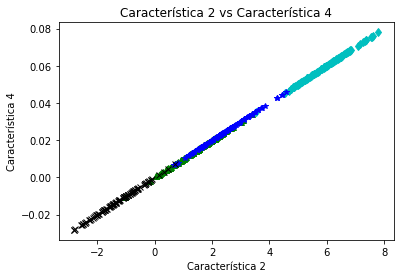

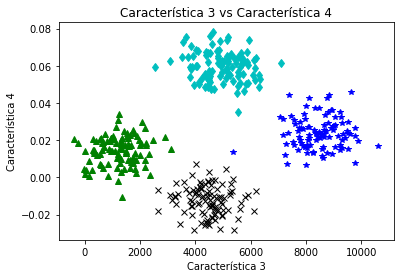

In [12]:
# espacio para la solución del ejercicio 1
print(np.unique(y))
print(X.shape)

#plt.plot(X[:,0],X[:,1], 'rs')

# Grafico:
#   (
#     posiciones de X donde se cumpla que: 
#       [
#          su última columna(etiquetas)(4) corresponda a un valor específico del vector y(etiquetas)
#       ,  
#          en la columna 0
#       ]
#   ,
#     posiciones de X donde se cumpla que: 
#       [
#          su última columna(etiquetas)(4) corresponda a un valor específico del vector y(etiquetas)
#       ,  
#          en la columna 1
#       ]
#   ,
#     con el color y forma deseados
#   )


# Característica 1 vs Característica 2
plt.title('Característica 1 vs Característica 2')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

#plt.plot(X[:,0],X[:,1], 'rs')
plt.plot(X[np.where(data[:,4] == y[0]),0],X[np.where(data[:,4] == y[0]),1], 'g^')
plt.plot(X[np.where(data[:,4] == y[1]),0],X[np.where(data[:,4] == y[1]),1], 'cd')
plt.plot(X[np.where(data[:,4] == y[2]),0],X[np.where(data[:,4] == y[2]),1], 'b*')
plt.plot(X[np.where(data[:,4] == y[3]),0],X[np.where(data[:,4] == y[3]),1], 'kx')

plt.show()

# Característica 1 vs Característica 3
plt.title('Característica 1 vs Característica 3')
plt.xlabel('Característica 1')
plt.ylabel('Característica 3')

#plt.plot(X[:,0],X[:,2], 'rs')
plt.plot(X[np.where(data[:,4] == y[0]),0],X[np.where(data[:,4] == y[0]),2], 'g^')
plt.plot(X[np.where(data[:,4] == y[1]),0],X[np.where(data[:,4] == y[1]),2], 'cd')
plt.plot(X[np.where(data[:,4] == y[2]),0],X[np.where(data[:,4] == y[2]),2], 'b*')
plt.plot(X[np.where(data[:,4] == y[3]),0],X[np.where(data[:,4] == y[3]),2], 'kx')

plt.show()

# Característica 1 vs Característica 4
plt.title('Característica 1 vs Característica 4')
plt.xlabel('Característica 1')
plt.ylabel('Característica 4')

#plt.plot(X[:,0],X[:,3], 'rs')
plt.plot(X[np.where(data[:,4] == y[0]),0],X[np.where(data[:,4] == y[0]),3], 'g^')
plt.plot(X[np.where(data[:,4] == y[1]),0],X[np.where(data[:,4] == y[1]),3], 'cd')
plt.plot(X[np.where(data[:,4] == y[2]),0],X[np.where(data[:,4] == y[2]),3], 'b*')
plt.plot(X[np.where(data[:,4] == y[3]),0],X[np.where(data[:,4] == y[3]),3], 'kx')

plt.show()

# Característica 2 vs Característica 3
plt.title('Característica 2 vs Característica 3')
plt.xlabel('Característica 2')
plt.ylabel('Característica 3')

#plt.plot(X[:,1],X[:,2], 'rs')
plt.plot(X[np.where(data[:,4] == y[0]),1],X[np.where(data[:,4] == y[0]),2], 'g^')
plt.plot(X[np.where(data[:,4] == y[1]),1],X[np.where(data[:,4] == y[1]),2], 'cd')
plt.plot(X[np.where(data[:,4] == y[2]),1],X[np.where(data[:,4] == y[2]),2], 'b*')
plt.plot(X[np.where(data[:,4] == y[3]),1],X[np.where(data[:,4] == y[3]),2], 'kx')

plt.show()

# Característica 2 vs Característica 4
plt.title('Característica 2 vs Característica 4')
plt.xlabel('Característica 2')
plt.ylabel('Característica 4')

#plt.plot(X[:,1],X[:,3], 'rs')
plt.plot(X[np.where(data[:,4] == y[0]),1],X[np.where(data[:,4] == y[0]),3], 'g^')
plt.plot(X[np.where(data[:,4] == y[1]),1],X[np.where(data[:,4] == y[1]),3], 'cd')
plt.plot(X[np.where(data[:,4] == y[2]),1],X[np.where(data[:,4] == y[2]),3], 'b*')
plt.plot(X[np.where(data[:,4] == y[3]),1],X[np.where(data[:,4] == y[3]),3], 'kx')

plt.show()

# Característica 3 vs Característica 4
plt.title('Característica 3 vs Característica 4')
plt.xlabel('Característica 3')
plt.ylabel('Característica 4')

#plt.plot(X[:,2],X[:,3], 'rs')
plt.plot(X[np.where(data[:,4] == y[0]),2],X[np.where(data[:,4] == y[0]),3], 'g^')
plt.plot(X[np.where(data[:,4] == y[1]),2],X[np.where(data[:,4] == y[1]),3], 'cd')
plt.plot(X[np.where(data[:,4] == y[2]),2],X[np.where(data[:,4] == y[2]),3], 'b*')
plt.plot(X[np.where(data[:,4] == y[3]),2],X[np.where(data[:,4] == y[3]),3], 'kx')

plt.show()



** Ejercicio 2**

Particiona la base de datos en entrenamiento y validación con 70% 30%. Preprocesa los datos con remoción de la media.

In [4]:
# espacio para la solución del ejercicio 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

def remocion_train_test(X_train,X_test):
    media_train = X_train.mean(axis = 0) # calculamos la media del conjunto de entrenamiento
    desviacion_train = X_train.std(axis = 0) # calculamos la desviacion estándar del conjunto de entrenamiento
    
    X_train_rem = (X_train - media_train)/desviacion_train # preprocesamos la matriz de entrenamiento
    X_test_rem = (X_test - media_train)/desviacion_train # preprocesamos la matriz de validacion o test
    
    return X_train_rem, X_test_rem

#X_train y X_test usando preprocesamiento por remocion de la media
X_train_remocion, X_test_remocion = remocion_train_test(X_train, X_test)

In [5]:
clasificador = GaussianNB() #instanciamos el clasificador
clasificador.fit(X_train_remocion,y_train) #entrenamos el clasificador con la matriz de entranamiento pre-procesada
print(X_test_remocion.shape)
y_predict = clasificador.predict(X_test_remocion) #validamos el clasificador sobre el conjunto de entrenamiento
acc = 100.0*(y_test == y_predict).sum()/X_test_remocion.shape[0] #calculamos el acierto de clasificación
print('El acierto de clasificación es del ',acc , '%') #imprimimos el acierto de clasificacion

(120, 4)
El acierto de clasificación es del  99.1666666667 %


In [6]:
print(y_train.shape)
print(X_train_remocion.shape)
holi = np.vstack(y_train)
print(holi.shape)


(280,)
(280, 4)
(280, 1)


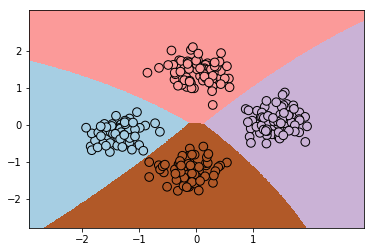

In [57]:
clasificador = GaussianNB() #instanciamos el clasificador
clasificador.fit(X_train_remocion[:,0:2],y_train) #entrenamos el clasificador con la matriz de entranamiento pre-procesada

def visualizar_clasificador(clasificador, X, y): #definimos la función. Las entradas son el clasificador (instanciamiento), 
    #la matriz de observaciones y el vector de etiquetas.
    #definimos los máximos valores de X e y para la malla
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0  #definimos los mínimos y máximos de X en la dimensión 1 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0  #definimos los mínimos y máximos de X en la dimensión 2
    #definimos el paso de la malla (todos los valores que nos permiten graficar las fronteras)
    mesh_step_size = 0.01
    #definimos la malla para x e y
    x_vals, y_vals = np.mgrid[min_x:max_x:mesh_step_size, min_y:max_y:mesh_step_size]
    #corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    #reordenamos la salida
    resultados = resultados.reshape(x_vals.shape)
    #creamos la figura
    plt.figure()
    #elegimos los colores
    plt.pcolormesh(x_vals,y_vals,resultados,cmap=plt.cm.Paired)
    #ubicamos los puntos
    
    plt.scatter(X[:,0],X[:,1],c=y,s=75,edgecolors='black',linewidth=1,cmap=plt.cm.Paired)
    #especificamos los límites de la gráfica
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max())
    #especificamos los puntos que se visualizarán sobre los ejes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    #Graficamos
    plt.show()
    
visualizar_clasificador(clasificador, X_train_remocion, y_train)

** Ejercicio 3 **

Ahora, utiliza como matriz de observaciones $\mathbf{X}$ el conjunto de todas las observaciones pero **únicamente** con las dos combinaciones de características que consideras mejor separan las clases de acuerdo a las gráficas del **Ejercicio 2**. Preprocesa, particiona y clasifica con esa nueva matriz de observaciones. ¿Funciona mejor o peor el clasificador?

In [9]:
X2 = data[:,2:3]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y,test_size=0.3, random_state=0)

#espacio para solución del ejercicio 3
#X_train y X_test usando preprocesamiento por remocion de la media
X_train_remocion2, X_test_remocion2 = remocion_train_test(X_train2, X_test2)

clasificador2 = GaussianNB() #instanciamos el clasificador
clasificador2.fit(X_train_remocion2,y_train2) #entrenamos el clasificador con la matriz de entranamiento pre-procesada
y_predict2 = clasificador.predict(X_test_remocion2) #validamos el clasificador sobre el conjunto de entrenamiento
acc2 = 100.0*(y_test2 == y_predict2).sum()/X_test_remocion2.shape[0] #calculamos el acierto de clasificación
print('El acierto de clasificación es del ',acc2 , '%') #imprimimos el acierto de clasificacion





El acierto de clasificación es del  83.3333333333 %
